https://www.tensorflow.org/tutorials/keras/basic_text_classification

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

### Data preparation
Download the data.

In [34]:
imdb = tf.keras.datasets.imdb
vocabularySize = 10000
packed = imdb.load_data(num_words=vocabularySize)
(trainData, trainLabels), (testData, testLabels) = packed

The shapes and dtypes are

In [35]:
print(trainData.shape, trainData.dtype)
print(trainLabels.shape, trainLabels.dtype)
print(testData.shape, testData.dtype)
print(testLabels.shape, testLabels.dtype)

(25000,) object
(25000,) int64
(25000,) object
(25000,) int64


`trainData` and `testData` have `list`s of `int`s with variable lengths:

In [36]:
print(trainData[0])  # Example
print(np.fromiter((len(line) for line in trainData), int).mean())
print(np.fromiter((len(line) for line in testData), int).mean())

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
238.71364
230.8042


Let's prepare a function for **decoding** the `int` representations.

First obtain and process the int-to-word dict.

In [37]:
wordToIdx = imdb.get_word_index()  # dict[str, int]
idxToWord = {idx+3:word for word,idx in wordToIdx.items()}
idxToWord[0] = "<PAD>"
idxToWord[1] = "<START>"
idxToWord[2] = "<UNK>"  # unknown
idxToWord[3] = "<UNUSED>"

def decode(idxs: list) -> str:
    return ' '.join(idxToWord.get(idx, '?') for idx in idxs)

An example of the decoding is like

In [38]:
print(decode(trainData[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

Let's pad the reviews to set an equal length.

In [39]:
trainData = tf.keras.preprocessing.sequence.pad_sequences(trainData,
                                                          value=0,
                                                          padding='post',
                                                          maxlen=256)
testData = tf.keras.preprocessing.sequence.pad_sequences(testData,
                                                         value=0,
                                                         padding='post',
                                                         maxlen=256)

Now the shapes and dtypes are changed to

In [40]:
print(trainData.shape, trainData.dtype)
print(testData.shape, testData.dtype)

(25000, 256) int32
(25000, 256) int32


The decoding of a padded data looks like

In [42]:
decode(trainData[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### Model

In [45]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocabularySize, 16))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


The **embedding** layer embeds the word indices into 16-length vectors. The output dimension of the layer is `(batch, sequence_length, features)`, which is `(batch, 256, 16)` here.

The **pooling** layer averages out each example over the sequence dimension (the 2nd axis here). The output dimension becomes `(batch, features)`.

Split the data into a training set and a test set.

In [46]:
validateData = trainData[:10000]
validateLabels = trainLabels[:10000]
subTrainData = trainData[10000:]
subTrainLabels = trainLabels[10000:]

### Training

In [47]:
history = model.fit(subTrainData, subTrainLabels,
                    epochs=40,
                    batch_size=512,
                    validation_data=(validateData, validateLabels),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 124us/sample - loss: 0.6916 - accuracy: 0.6410 - val_loss: 0.6896 - val_accuracy: 0.7068
Epoch 2/40
15000/15000 [==============================] - 1s 63us/sample - loss: 0.6856 - accuracy: 0.7295 - val_loss: 0.6810 - val_accuracy: 0.7429
Epoch 3/40
15000/15000 [==============================] - 1s 69us/sample - loss: 0.6714 - accuracy: 0.7621 - val_loss: 0.6628 - val_accuracy: 0.7516
Epoch 4/40
15000/15000 [==============================] - 1s 65us/sample - loss: 0.6468 - accuracy: 0.7658 - val_loss: 0.6354 - val_accuracy: 0.7530
Epoch 5/40
15000/15000 [==============================] - 1s 64us/sample - loss: 0.6121 - accuracy: 0.7913 - val_loss: 0.5998 - val_accuracy: 0.7831
Epoch 6/40
15000/15000 [==============================] - 1s 73us/sample - loss: 0.5694 - accuracy: 0.8125 - val_loss: 0.5592 - val_accuracy: 0.8017
Epoch 7/40
15000/15000 [==============================]

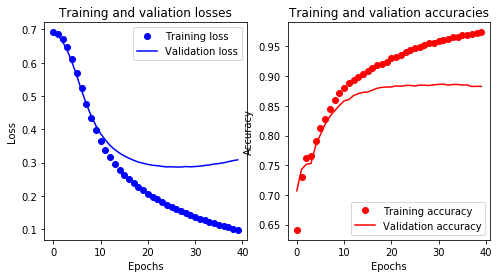

In [54]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'], 'bo', label='Training loss')
plt.plot(history.epoch, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and valiation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], 'ro', label='Training accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and valiation accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluation

In [56]:
result = model.evaluate(testData, testLabels)
print("Test loss and accuracy:", result)

25000/25000 [==============================] - 1s 37us/sample - loss: 0.3286 - accuracy: 0.8714
Test loss and accuracy: [0.32862340389728545, 0.87136]
